In [9]:
from sklearn.neural_network import MLPRegressor
from skopt import BayesSearchCV
import numpy as np

from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

In [22]:
import pandas as pd

df_train = pd.read_csv('../data_train_10clusters.csv')
df_test = pd.read_csv('../data_test_10clusters.csv')

In [23]:
x_train = df_train.drop(columns=['Year'])
y_train = df_train['Year']

x_test = df_test.drop(columns=['Year'])
y_test = df_test['Year']

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

In [16]:
param = {'hidden_layer_sizes':[50, 100, 200, 300], 
         'activation':['relu',  'logistic'], 
         'alpha':[0.0001, 0.001, 0.01],
         'momentum': [0.95, 0.90, 0.85, 0.8], 
         'learning_rate_init': [0.001, 0.01, 0.1],
         'n_iter_no_change':[20, 30, 40, 50], 
         'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPRegressor(max_iter=10000,early_stopping=True,random_state=0)
mlp_bs = BayesSearchCV(mlp, param, n_iter=15,
                        cv=10, 
                        scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        n_jobs=-1, 
                        refit=True, random_state=0) 
np.int = int     
mlp_bs.fit(x_train, y_train);

/usr/local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [29]:
mlp = MLPRegressor(activation='relu', alpha=0.01, hidden_layer_sizes=100, learning_rate='constant', learning_rate_init=0.1, momentum=0.95, n_iter_no_change=50)

In [30]:
mlp.fit(x_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.01, hidden_layer_sizes=100, learning_rate_init=0.1,
             momentum=0.95, n_iter_no_change=50)

In [18]:
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

In [19]:
show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
12,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.85, 'n_iter_no_change': 40}",-258.655860,1
13,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.8, 'n_iter_no_change': 40}",-258.655860,1
14,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.8, 'n_iter_no_change': 40}",-258.655860,1
8,"{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.9, 'n_iter_no_change': 30}",-258.663701,4
11,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'momentum': 0.9, 'n_iter_no_change': 30}",-258.679891,5


In [31]:
mean_squared_error(y_test,mlp.predict(x_test)), mean_absolute_error(y_test, mlp.predict(x_test))

(182.94167301413424, 10.885276543324256)

In [20]:
import matplotlib.pyplot as plt

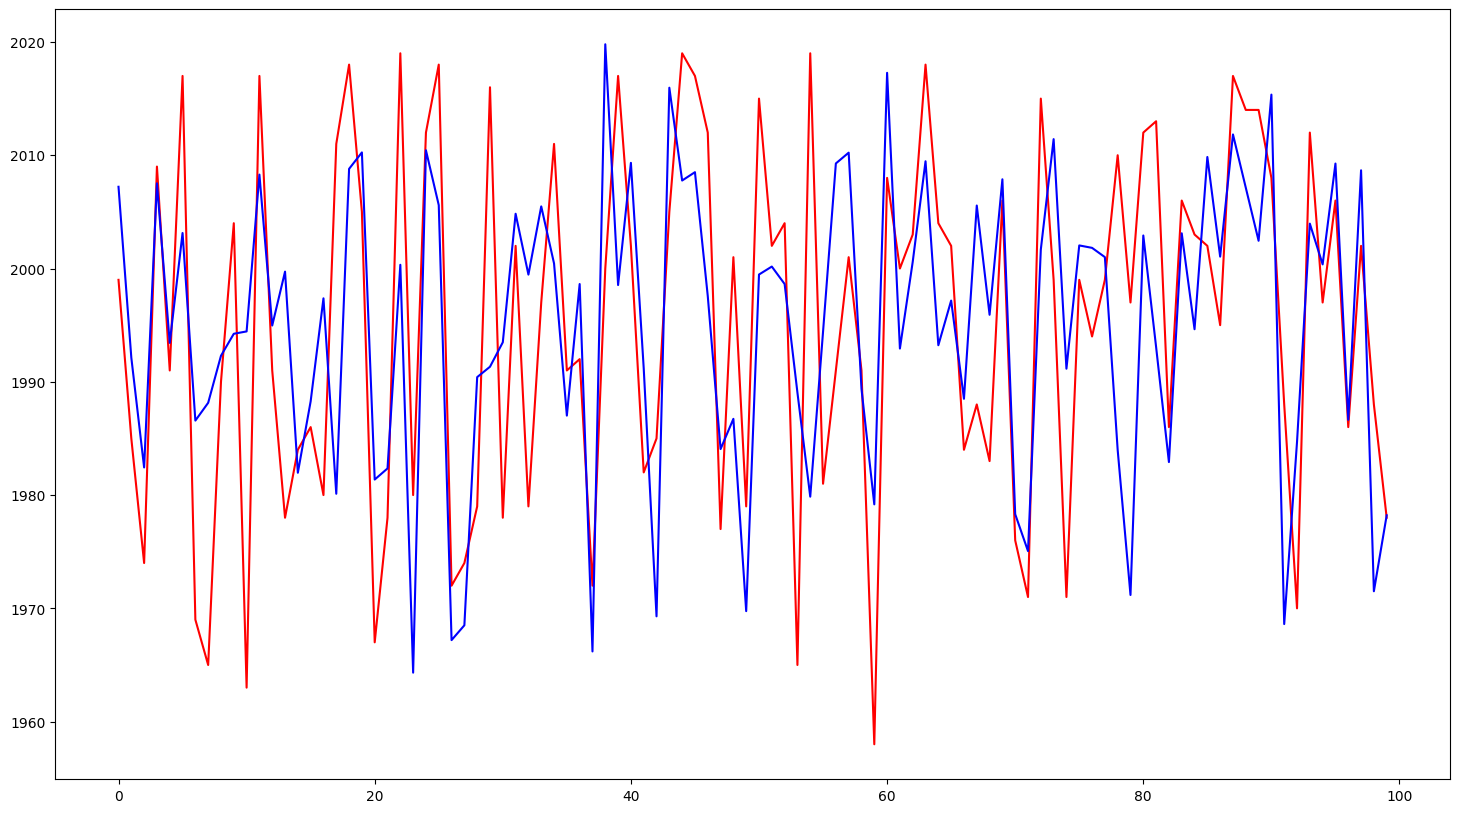

In [32]:
plt.figure(figsize=(18,10))
plt.plot(y_test[:100],'r');
plt.plot(mlp.predict(x_test[:100]),'b');